# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Loading the dataset

In [2]:
df = pd.read_csv('DataFiles\Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [4]:
df.duplicated().sum()

0

# Splitting the data

In [5]:
y = df['PRICE']
X = df.drop(columns = 'PRICE')

X

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT
0,0.00632,0.538,6.575,65.2,15.3,4.98
1,0.02731,0.469,6.421,78.9,17.8,9.14
2,0.02729,0.469,7.185,61.1,17.8,4.03
3,0.03237,0.458,6.998,45.8,18.7,2.94
4,0.06905,0.458,7.147,54.2,18.7,5.33
...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,21.0,9.67
502,0.04527,0.573,6.120,76.7,21.0,9.08
503,0.06076,0.573,6.976,91.0,21.0,5.64
504,0.10959,0.573,6.794,89.3,21.0,6.48


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Setting up the decision tree. 
For Decision Trees, we don't need to scale the data, so no preprocessing objects are necessary

In [7]:
REGtree = DecisionTreeRegressor(random_state = 42)

REGtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [8]:
# Getting our predictions for training and test
y_hat_train = REGtree.predict(X_train)
y_hat_test = REGtree.predict(X_test)

In [10]:
train_score = REGtree.score(X_train, y_train)
test_score = REGtree.score(X_test, y_test)

print(f'Train: {train_score}')
print(f'Test: {test_score}')

Train: 1.0
Test: 0.6193230918136841


# Tuning the Hyperparameters in the tree

In [11]:
REGtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [12]:
REGtree.get_depth()

20

* I'm going to loop through possible depths and store the R2 scores in a new dataframe

In [15]:
depths = list(range(1,21))
scores = pd.DataFrame(index = depths, columns = ['Test Score', 'Train Score'])
for i in depths:
    REGtree = DecisionTreeRegressor(max_depth=i, random_state=42)
    REGtree.fit(X_train, y_train)
    train_score = REGtree.score(X_train, y_train)
    test_score = REGtree.score(X_test, y_test)
    scores.loc[i, 'Train Score'] = train_score
    scores.loc[i, 'Test Score'] = test_score

In [16]:
scores

,Test Score,Train Score
1,0.354886,0.475164
2,0.637038,0.708946
3,0.692895,0.811522
4,0.708098,0.87661
5,0.770697,0.903371
6,0.825985,0.942742
7,0.846377,0.958517
8,0.638301,0.973429
9,0.684588,0.982104
10,0.84601,0.986796


In [18]:
scores.sort_values(by = 'Test Score', ascending=False)

,Test Score,Train Score
7,0.846377,0.958517
10,0.84601,0.986796
11,0.829736,0.9911
12,0.827102,0.995358
6,0.825985,0.942742
14,0.822996,0.998707
13,0.814126,0.997224
5,0.770697,0.903371
19,0.768847,1.0
15,0.733856,0.999476


It looks like 7 is the best depth

Text(0, 0.5, 'R2 Score')

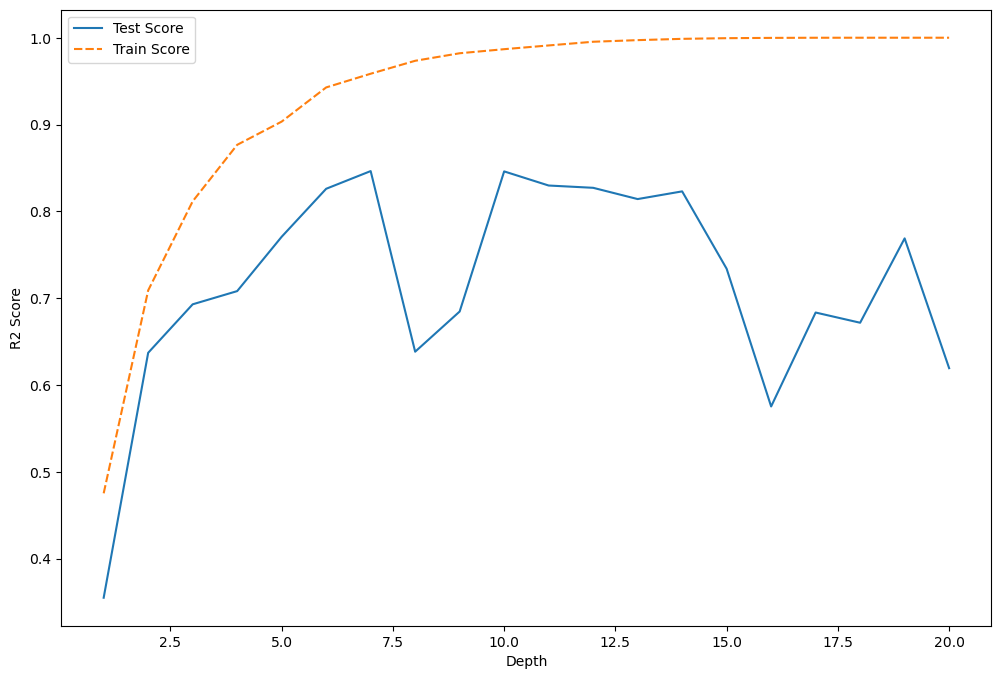

In [20]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data = scores, ax = ax)
ax.set_xlabel('Depth')
ax.set_ylabel('R2 Score')

* lets run the tree with this parameter

In [21]:
reg_tree = DecisionTreeRegressor(random_state = 42, max_depth = 7)
reg_tree.fit(X_train, y_train)

train_7_score = reg_tree.score(X_train, y_train)
test_7_score = reg_tree.score(X_test, y_test)

print(train_7_score)
print(test_7_score)

0.958516936961625
0.8463768203632204
